In [20]:
#stacking players
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

pd.options.mode.chained_assignment = None

#import data
df2 = pd.read_csv('/Users/tylerchurch/Downloads/2019 (1).csv')

#drop col
df2.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb',
          'GS', 'Age', 'Tgt', 'Y/A', 'Att', 'Att.1', 'Cmp', 'Y/R'], axis=1, inplace=True)
#name formatting
df2['Player']=df2['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

#rename columns
df2.rename({'TD': 'PassingTD', 'TD.1': 'RushingTD', 'TD.2': 'ReceivingTD', 'TD.3': 'TotalTD', 'Yds': 'PassingYDs',
           'Yds.1': 'RushingYDs', 'Yds.2': 'ReceivingYDs'}, axis=1, inplace=True)

#create fantasy points
df2['FantasyPoints'] = (df2['RushingYDs']*0.1 + df2['RushingTD']*6 + df2['Rec']*0.5 + df2['ReceivingYDs']*0.1
+ df2['ReceivingTD']*6 - df2['FL']*2 + df2['PassingYDs']*0.04 +df2['PassingTD']*4 - df2['Int']*2)

#fantasy points per game
df2['FantasyPoints/G'] = df2['FantasyPoints']/df2['G']

#filter df
df2 = df2[['Tm', 'FantPos', 'FantasyPoints', 'FantasyPoints/G']]

#removeplayers on multiple teams in season
df2 = df2[df2['Tm'] != '2TM']
df2 = df2[df2['Tm'] != '3TM']

#seperate by position
rb_df = df2[df2['FantPos'] == 'RB']
qb_df = df2[df2['FantPos'] == 'QB']
wr_df = df2[df2['FantPos'] == 'WR']
te_df = df2[df2['FantPos'] == 'TE']

te_df.head()


,Tm,FantPos,FantasyPoints,FantasyPoints/G
7,KAN,TE,205.8,12.862500
12,BAL,TE,175.2,11.680000
15,SFO,TE,180.0,12.857143
18,OAK,TE,176.0,11.000000
21,PHI,TE,169.6,11.306667


In [21]:
#determine top positional players on each team RB1, RB2, WR1, ...
def get_top_players(df, n):
    return df.groupby('Tm').apply(lambda x: x.nlargest(n, ['FantasyPoints']).min()).reset_index(drop=True)

qb_df = get_top_players(qb_df, 1)
te_df = get_top_players(te_df, 1)
rb1_df = get_top_players(rb_df, 1)
rb2_df = get_top_players(rb_df, 2)
wr1_df = get_top_players(wr_df, 1)
wr2_df = get_top_players(wr_df, 2)
wr3_df = get_top_players(wr_df, 3)

#create new names
new_names = {'QB1': qb_df, 'TE1': te_df, 'RB1': rb1_df, 'RB2': rb2_df, 'WR1': wr1_df, 'WR2': wr2_df, 'WR3': wr3_df}

for name, new_df in new_names.items():
    new_df.rename({'FantasyPoints/G': name}, axis=1, inplace=True)
    new_df.drop(['FantPos', 'FantasyPoints'], axis=1, inplace=True)
    new_df.set_index('Tm', inplace=True)
    
df = pd.concat([qb_df, te_df, rb1_df, rb2_df, wr1_df, wr2_df, wr3_df], axis=1)
df.head()

,QB1,TE1,RB1,RB2,WR1,WR2,WR3
Tm,,,,,,,
ARI,17.455000,2.580000,9.500000,5.907692,8.743750,8.743750,5.081818
ATL,17.689333,11.707692,12.007143,5.183333,14.973333,12.576923,4.643750
BAL,27.712000,11.680000,15.033333,5.568750,8.814286,4.975000,3.100000
BUF,17.660000,4.380000,11.116667,5.525000,12.254667,9.820000,3.320000
CAR,13.652308,6.978571,25.700000,1.643750,12.466667,9.043750,2.681250


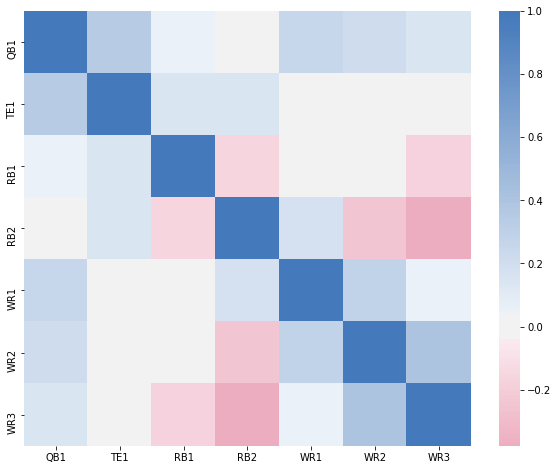

In [22]:
#set up corr matrix and heatmap
corrMatrix = df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(10,8)

cmap = sns.diverging_palette(0,250, as_cmap=True)

vizCorrMatrix = sns.heatmap(corrMatrix, cmap=cmap, center=0)

In [24]:
#create a new column
#rb_df['Rec/G'] = rb_df['Rec']/rb_df['G']

#filter
#rb_df = rb_df[rb_df['Rec'] > 5]

#plot
#fig, ax = plt.subplot
#fig.set_size_inches(10,8)
#mask = np.zeros_like(corrMatrix, dtype=np.bool)
#mask[np.triu.indices_from(mask)] = True
#vizCorrMatrix = sns.heatmap(corrMatrix, mask=mask, cmap=cmap, center=0)